# Recurrent Neural Network (Time Series)

Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Download Data
# !gdown --id 1nPw071R3tZi4zqVcmXA6kXVTe43Ex6K3 --output london_bike_sharing.csv

Downloading...
From: https://drive.google.com/uc?id=1nPw071R3tZi4zqVcmXA6kXVTe43Ex6K3
To: /content/london_bike_sharing.csv
100% 1.03M/1.03M [00:00<00:00, 65.9MB/s]


In [2]:
#Membaca Data
df = pd.read_csv(
  "london_bike_sharing.csv", 
  parse_dates=['timestamp']
)
df.head(4)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0


1. "timestamp" - timestamp field for grouping the data
1. "cnt" - the count of a new bike shares
1. "t1" - real temperature in C
1. "t2" - temperature in C "feels like"
1. "hum" - humidity in percentage
1. "windspeed" - wind speed in km/h
1. "weathercode" - category of the weather
1. "isholiday" - boolean field - 1 holiday / 0 non holiday
1. "isweekend" - boolean field - 1 if the day is weekend
1. "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

1. "weather_code" category description:
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog

In [3]:
df.shape

(17414, 10)

In [4]:
#Menyimpan Tanggal
dates = pd.to_datetime(df['timestamp'])
dates

0       2015-01-04 00:00:00
1       2015-01-04 01:00:00
2       2015-01-04 02:00:00
3       2015-01-04 03:00:00
4       2015-01-04 04:00:00
                ...        
17409   2017-01-03 19:00:00
17410   2017-01-03 20:00:00
17411   2017-01-03 21:00:00
17412   2017-01-03 22:00:00
17413   2017-01-03 23:00:00
Name: timestamp, Length: 17414, dtype: datetime64[ns]

In [5]:
df = df.set_index('timestamp')
df.head(4)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0


In [6]:
df.shape

(17414, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.3 MB


In [8]:
df.isnull().sum()

cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [9]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


EDA

<AxesSubplot:>

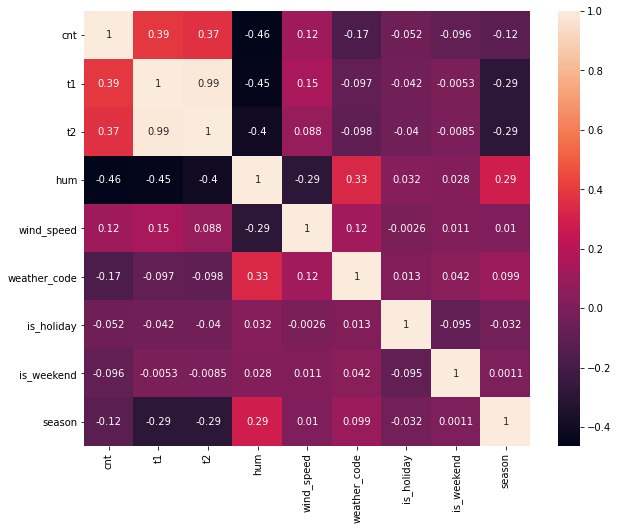

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

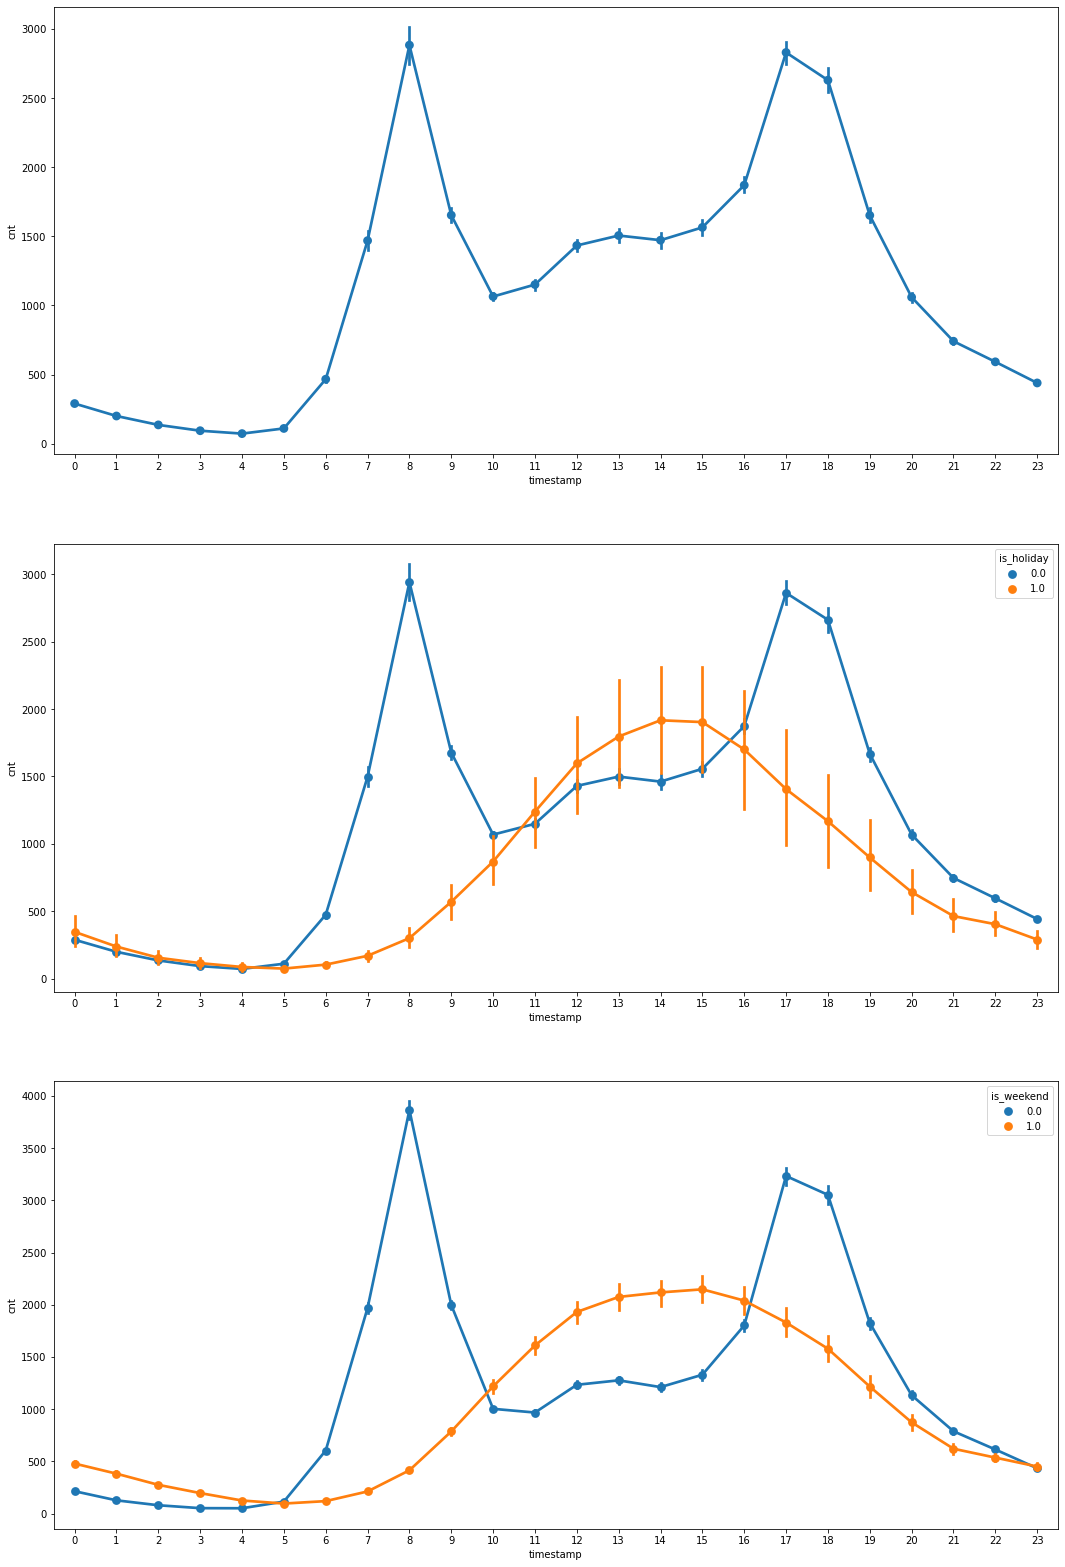

In [11]:
fig,(ax1, ax2, ax3)= plt.subplots(nrows=3)
fig.set_size_inches(18, 28)

hour = df.index.hour
sns.pointplot(x=hour, y=df['cnt'], ax=ax1)
sns.pointplot(x=hour, y=df['cnt'], hue=df['is_holiday'], ax=ax2)
sns.pointplot(x=hour, y=df['cnt'], hue=df['is_weekend'], ax=ax3)

Preprocessing

In [12]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

15672 1742


In [13]:
from sklearn.preprocessing import MinMaxScaler

kolom = ['t1', 't2', 'hum', 'wind_speed']

x_scale = MinMaxScaler()
y_scale = MinMaxScaler()

x_scale = x_scale.fit(train[kolom])
y_scale = y_scale.fit(train[['cnt']])

train.loc[:,kolom] = x_scale.transform(train[kolom]) 
train['cnt'] = y_scale.transform(train[['cnt']])

test.loc[:,kolom] = x_scale.transform(test[kolom]) 
test['cnt'] = y_scale.transform(test[['cnt']])

D:\Application\Anaconda\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-13-546968426c6f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['cnt'] = y_scale.transform(train[['cnt']])
D:\Application\Anaconda\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [14]:
train.head(4)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,0.023155,0.126761,0.2000,0.911950,0.106195,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,0.017557,0.126761,0.2125,0.911950,0.088496,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,0.017048,0.112676,0.2125,0.955975,0.000000,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,0.009160,0.098592,0.2000,1.000000,0.000000,1.0,0.0,1.0,3.0


In [15]:
train.shape

(15672, 9)

(samples, features) -> (samples, timestep, features)

In [16]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [17]:
time_steps = 10

X_train, y_train = create_dataset(train, train['cnt'], time_steps)
X_test, y_test = create_dataset(test, test['cnt'], time_steps)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15662, 10, 9) (15662,)
(1732, 10, 9) (1732,)


Model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(LSTM(64, activation='relu',
               input_shape=(X_train.shape[1],X_train.shape[2]),
               return_sequences=True))
model.add(LSTM(64, activation='relu'))
model.add(Dense(1))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 64)            18944     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 52,033
Trainable params: 52,033
Non-trainable params: 0
_________________________________________________________________


In [20]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                     patience=3)

In [21]:
model.compile(optimizer='adam', loss='mse')
  
history = model.fit(X_train, y_train, 
                    epochs=500,
                    batch_size=32,  
                    validation_split=0.1,
                    callbacks=[callback],
                    shuffle=False)

Epoch 1/500
441/441 [==============================] - 16s 19ms/step - loss: 0.0156 - val_loss: 0.0151
Epoch 2/500
441/441 [==============================] - 8s 18ms/step - loss: 0.0082 - val_loss: 0.0093
Epoch 3/500
441/441 [==============================] - 8s 17ms/step - loss: 0.0052 - val_loss: 0.0054
Epoch 4/500
441/441 [==============================] - 8s 18ms/step - loss: 0.0034 - val_loss: 0.0030
Epoch 5/500
441/441 [==============================] - 8s 18ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 6/500
441/441 [==============================] - 8s 18ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 7/500
441/441 [==============================] - 8s 18ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 8/500
441/441 [==============================] - 8s 18ms/step - loss: 9.1972e-04 - val_loss: 0.0011
Epoch 9/500
441/441 [==============================] - 8s 18ms/step - loss: 8.1491e-04 - val_loss: 0.0011
Epoch 10/500
441/441 [==============================] - 8s 18ms/step - lo

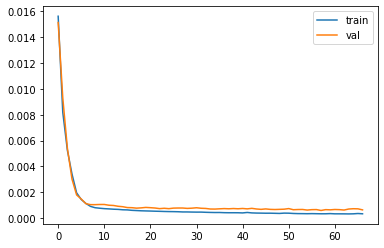

In [22]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.legend()
plt.show()

Prediksi

In [23]:
y_pred = model.predict(X_test)

In [24]:
y_pred[0:5]

array([[0.19322316],
       [0.13263908],
       [0.08625047],
       [0.06200588],
       [0.05162555]], dtype=float32)

In [25]:
y_pred_inv = y_scale.inverse_transform(y_pred)
y_test_inv = y_scale.inverse_transform(y_test.reshape(1, -1))

In [26]:
print(y_pred_inv[:5].flatten())
print(y_test_inv[:5])

[1518.734   1042.5432   677.9287   487.36624  405.77682]
[[1376.  894.  615. ...  337.  224.  139.]]


In [27]:
y_pred_inv = y_pred_inv.astype('int64')
y_test_inv = y_test_inv.astype('int64')

In [28]:
print(y_pred_inv[:5].flatten())
print(y_test_inv[:5])

[1518 1042  677  487  405]
[[1376  894  615 ...  337  224  139]]


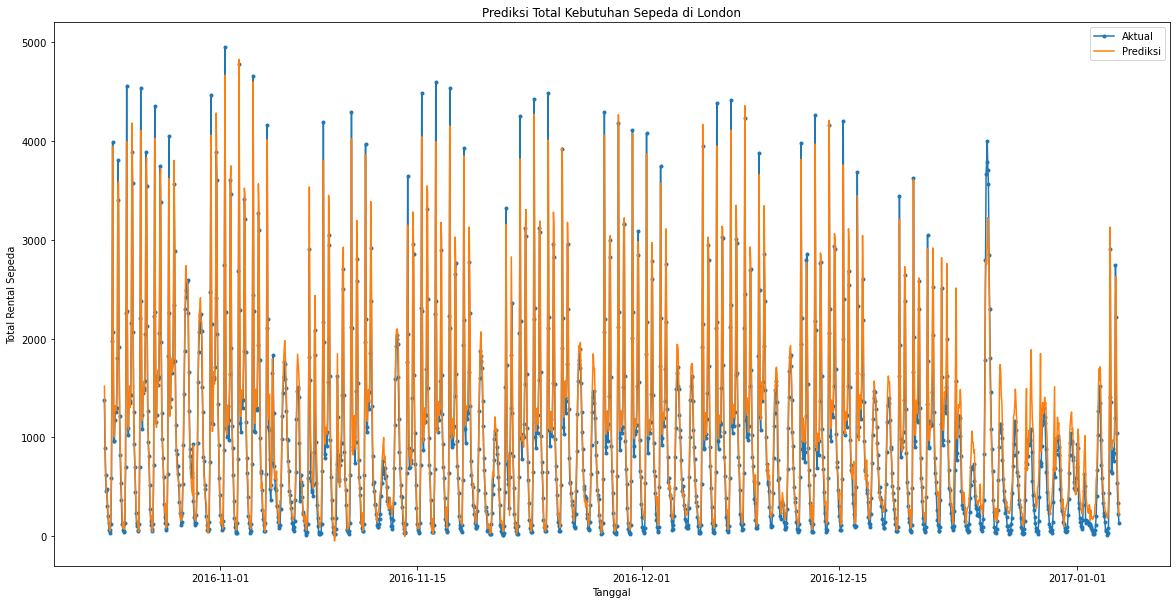

In [29]:
plt.figure(figsize=(20,10))
plt.plot(dates[-X_test.shape[0]:], y_test_inv.flatten(), marker='.', label="Aktual")
plt.plot(dates[-X_test.shape[0]:], y_pred_inv.flatten(), label="Prediksi")
plt.ylabel('Total Rental Sepeda')
plt.xlabel('Tanggal')
plt.title('Prediksi Total Kebutuhan Sepeda di London')
plt.legend()
plt.show()

In [30]:
df_forecast = pd.DataFrame({
    'Date' : dates[-X_test.shape[0]:],
    'Bike Count' : y_pred_inv.flatten()
    })

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

from sklearn.utils.validation import check_consistent_length, check_array

"""
eror ketika mengimport mean_absolute_percentage_error, maka kami membuat fungsi sendiri
"""
def mean_absolute_percentage_error(y_true, y_pred,
                                   sample_weight=None,
                                   multioutput='uniform_average'):
    """Mean absolute percentage error regression loss.
    Note here that we do not represent the output as a percentage in range
    [0, 100]. Instead, we represent it in range [0, 1/eps]. Read more in the
    :ref:`User Guide <mean_absolute_percentage_error>`.
    .. versionadded:: 0.24
    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Estimated target values.
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    multioutput : {'raw_values', 'uniform_average'} or array-like
        Defines aggregating of multiple output values.
        Array-like value defines weights used to average errors.
        If input is list then the shape must be (n_outputs,).
        'raw_values' :
            Returns a full set of errors in case of multioutput input.
        'uniform_average' :
            Errors of all outputs are averaged with uniform weight.
    Returns
    -------
    loss : float or ndarray of floats in the range [0, 1/eps]
        If multioutput is 'raw_values', then mean absolute percentage error
        is returned for each output separately.
        If multioutput is 'uniform_average' or an ndarray of weights, then the
        weighted average of all output errors is returned.
        MAPE output is non-negative floating point. The best value is 0.0.
        But note the fact that bad predictions can lead to arbitarily large
        MAPE values, especially if some y_true values are very close to zero.
        Note that we return a large value instead of `inf` when y_true is zero.
    Examples
    --------
    >>> from sklearn.metrics import mean_absolute_percentage_error
    >>> y_true = [3, -0.5, 2, 7]
    >>> y_pred = [2.5, 0.0, 2, 8]
    >>> mean_absolute_percentage_error(y_true, y_pred)
    0.3273...
    >>> y_true = [[0.5, 1], [-1, 1], [7, -6]]
    >>> y_pred = [[0, 2], [-1, 2], [8, -5]]
    >>> mean_absolute_percentage_error(y_true, y_pred)
    0.5515...
    >>> mean_absolute_percentage_error(y_true, y_pred, multioutput=[0.3, 0.7])
    0.6198...
    """
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
        y_true, y_pred, multioutput)
    check_consistent_length(y_true, y_pred, sample_weight)
    epsilon = np.finfo(np.float64).eps
    mape = np.abs(y_pred - y_true) / np.maximum(np.abs(y_true), epsilon)
    output_errors = np.average(mape,
                               weights=sample_weight, axis=0)
    if isinstance(multioutput, str):
        if multioutput == 'raw_values':
            return output_errors
        elif multioutput == 'uniform_average':
            # pass None as weights to np.average: uniform mean
            multioutput = None

    return np.average(output_errors, weights=multioutput)

def _check_reg_targets(y_true, y_pred, multioutput, dtype="numeric"):
    """Check that y_true and y_pred belong to the same regression task.
    Parameters
    ----------
    y_true : array-like
    y_pred : array-like
    multioutput : array-like or string in ['raw_values', uniform_average',
        'variance_weighted'] or None
        None is accepted due to backward compatibility of r2_score().
    Returns
    -------
    type_true : one of {'continuous', continuous-multioutput'}
        The type of the true target data, as output by
        'utils.multiclass.type_of_target'.
    y_true : array-like of shape (n_samples, n_outputs)
        Ground truth (correct) target values.
    y_pred : array-like of shape (n_samples, n_outputs)
        Estimated target values.
    multioutput : array-like of shape (n_outputs) or string in ['raw_values',
        uniform_average', 'variance_weighted'] or None
        Custom output weights if ``multioutput`` is array-like or
        just the corresponding argument if ``multioutput`` is a
        correct keyword.
    dtype : str or list, default="numeric"
        the dtype argument passed to check_array.
    """
    check_consistent_length(y_true, y_pred)
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
    y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)

    if y_true.ndim == 1:
        y_true = y_true.reshape((-1, 1))

    if y_pred.ndim == 1:
        y_pred = y_pred.reshape((-1, 1))

    if y_true.shape[1] != y_pred.shape[1]:
        raise ValueError("y_true and y_pred have different number of output "
                         "({0}!={1})".format(y_true.shape[1], y_pred.shape[1]))

    n_outputs = y_true.shape[1]
    allowed_multioutput_str = ('raw_values', 'uniform_average',
                               'variance_weighted')
    if isinstance(multioutput, str):
        if multioutput not in allowed_multioutput_str:
            raise ValueError("Allowed 'multioutput' string values are {}. "
                             "You provided multioutput={!r}".format(
                                 allowed_multioutput_str,
                                 multioutput))
    elif multioutput is not None:
        multioutput = check_array(multioutput, ensure_2d=False)
        if n_outputs == 1:
            raise ValueError("Custom weights are useful only in "
                             "multi-output cases.")
        elif n_outputs != len(multioutput):
            raise ValueError(("There must be equally many custom weights "
                              "(%d) as outputs (%d).") %
                             (len(multioutput), n_outputs))
    y_type = 'continuous' if n_outputs == 1 else 'continuous-multioutput'

    return y_type, y_true, y_pred, multioutput

x = y_test_inv.flatten()
y = df_forecast['Bike Count'].values

mse = mean_squared_error(x,y)
rmse = mean_squared_error(x,y,squared=False) #RMSE
mae = mean_absolute_error(x,y)
mape = mean_absolute_percentage_error(x,y)
nilai_r = r2_score(x,y)

print('Nilai Mean Squared Error             = {:.2f}'.format(mse))
print('Nilai Root Mean Squared Error        = {:.2f}'.format(rmse))
print('Nilai Mean Absolute Error            = {:.2f}'.format(mae))
print('Nilai Mean Absolute Percentage Error = {:.2f}'.format(mape))
print('Nilai R2                             = {:.2f}'.format(nilai_r))

Nilai Mean Squared Error             = 39876.77
Nilai Root Mean Squared Error        = 199.69
Nilai Mean Absolute Error            = 144.37
Nilai Mean Absolute Percentage Error = 0.55
Nilai R2                             = 0.95


In [35]:
df_forecast.to_csv('Hasil Prediksi.csv')